In [13]:
#Importação dos dados
!wget -q "https://raw.githubusercontent.com/NeimarSntn/Acidente-de-Transito/refs/heads/main/PortoAlegre.csv" -O 'poaacidentes2024.csv'


In [14]:
#Leitura do arquivo
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

read_csv = "/content/poaacidentes2024.csv"

df = pd.read_csv(read_csv, sep=";", encoding='utf-8')

df.head()


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,572796,1271729.0,05/01/2024,sexta-feira,17:40:00,RS,290.0,91,PORTO ALEGRE,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-29,96955555","-51,16954207",SPRF-RS,DEL01-RS,UOP01-DEL01-RS
1,572796,1271728.0,05/01/2024,sexta-feira,17:40:00,RS,290.0,91,PORTO ALEGRE,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-29,96955555","-51,16954207",SPRF-RS,DEL01-RS,UOP01-DEL01-RS
2,572796,1271730.0,05/01/2024,sexta-feira,17:40:00,RS,290.0,91,PORTO ALEGRE,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-29,96955555","-51,16954207",SPRF-RS,DEL01-RS,UOP01-DEL01-RS
3,572796,1271731.0,05/01/2024,sexta-feira,17:40:00,RS,290.0,91,PORTO ALEGRE,Sim,...,Feminino,1.0,0.0,0.0,0.0,"-29,96955555","-51,16954207",SPRF-RS,DEL01-RS,UOP01-DEL01-RS
4,572806,1271756.0,05/01/2024,sexta-feira,18:30:00,RS,290.0,102,PORTO ALEGRE,Sim,...,Masculino,1.0,0.0,0.0,0.0,"-29,987228","-51,25613",SPRF-RS,DEL01-RS,UOP01-DEL01-RS


In [ ]:
#Selecionando apenas as colunas que serão analisadas
df_tipo_veiculo = df[['tipo_veiculo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos']]
df_tipo_veiculo.head()

,tipo_veiculo,ilesos,feridos_leves,feridos_graves,mortos
0,Automóvel,1.0,0.0,0.0,0.0
1,Automóvel,1.0,0.0,0.0,0.0
2,Utilitário,1.0,0.0,0.0,0.0
3,Utilitário,1.0,0.0,0.0,0.0
4,Caminhonete,1.0,0.0,0.0,0.0


In [ ]:
#Removendo valores nulos
df_tipo_veiculo_limpo = df_tipo_veiculo.dropna(axis=0)

In [ ]:
#Verificando se existem valores nulos
df_tipo_veiculo_limpo.isnull().sum()

,0
tipo_veiculo,0
ilesos,0
feridos_leves,0
feridos_graves,0
mortos,0


In [ ]:
#Totalizando acidentes por tipo de veículo
contagem_veiculos = df_tipo_veiculo_limpo['tipo_veiculo'].value_counts()
contagem_veiculos

,count
tipo_veiculo,
Automóvel,366
Motocicleta,189
Caminhonete,42
Caminhão-trator,31
Caminhão,27
Ônibus,22
Utilitário,18
Motoneta,13
Camioneta,8


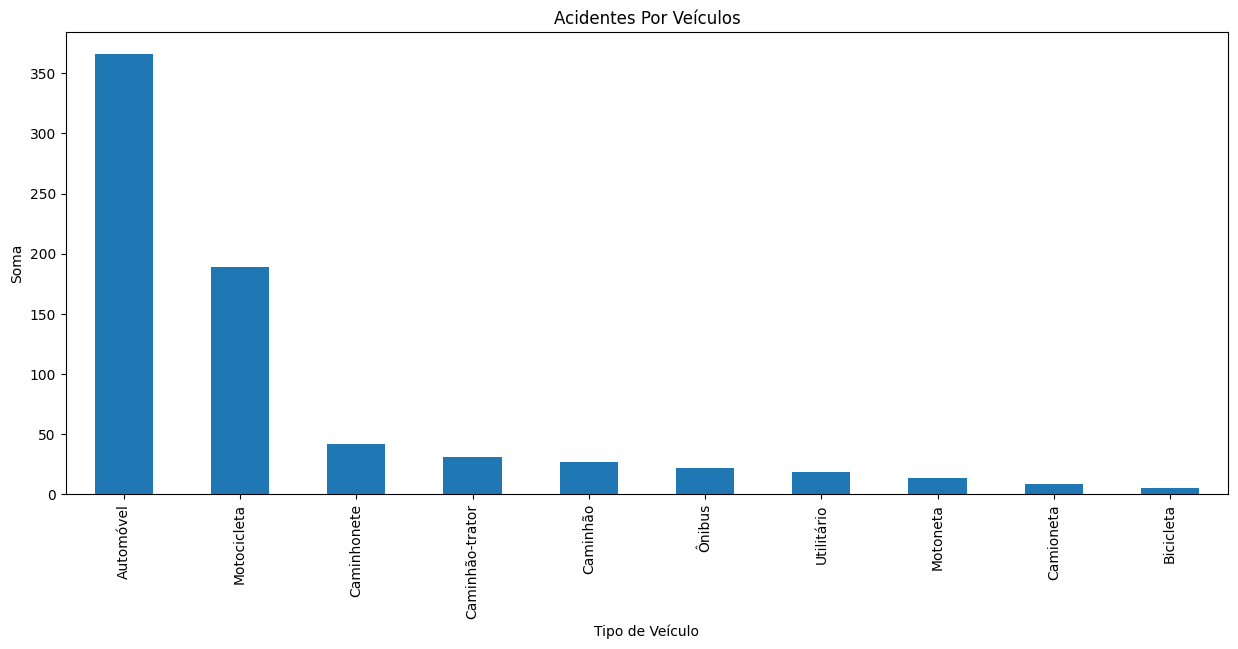

In [ ]:
#Demosntrato acidentes por veúculosm, como podemos oabservar os acindetes se concentram principalmente entre automóveis e motocicletas
plt.figure(figsize=(15, 6))
contagem_veiculos.plot(kind='bar')
plt.title('Acidentes Por Veículos')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Soma')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [ ]:
#Atribuindo um número inteiro para cada tipo de veículo
df_tipo_veiculo_copy = df_tipo_veiculo_limpo.copy()

label_encoder = LabelEncoder()
df_tipo_veiculo_copy.loc[:, 'tipo_veiculo_encoded'] = label_encoder.fit_transform(df_tipo_veiculo_copy['tipo_veiculo'])

df_tipo_veiculo_copy.head()

,tipo_veiculo,ilesos,feridos_leves,feridos_graves,mortos,tipo_veiculo_encoded
0,Automóvel,1.0,0.0,0.0,0.0,0
1,Automóvel,1.0,0.0,0.0,0.0,0
2,Utilitário,1.0,0.0,0.0,0.0,8
3,Utilitário,1.0,0.0,0.0,0.0,8
4,Caminhonete,1.0,0.0,0.0,0.0,2


In [ ]:
#Criando a coluna houve_feridos verificando se teve algum ferido no acidente
df_tipo_veiculo_copy['houve_feridos'] = (df_tipo_veiculo_copy['feridos_leves'] +
                                         df_tipo_veiculo_copy['feridos_graves'] +
                                         df_tipo_veiculo_copy['mortos']) > 0

if 'houve_feridos' in df_tipo_veiculo_copy.columns:
    df_tipo_veiculo_copy['houve_feridos'] = df_tipo_veiculo_copy['houve_feridos'].astype(int)
else:
    print("A coluna 'houve_feridos' não foi criada corretamente.")

df_tipo_veiculo_copy.head()


,tipo_veiculo,ilesos,feridos_leves,feridos_graves,mortos,tipo_veiculo_encoded,houve_feridos
0,Automóvel,1.0,0.0,0.0,0.0,0,0
1,Automóvel,1.0,0.0,0.0,0.0,0,0
2,Utilitário,1.0,0.0,0.0,0.0,8,0
3,Utilitário,1.0,0.0,0.0,0.0,8,0
4,Caminhonete,1.0,0.0,0.0,0.0,2,0


In [ ]:
#Preparação dos dados para treino e teste de machine learning
X = df_tipo_veiculo_copy[['tipo_veiculo_encoded']]
y = df_tipo_veiculo_copy['houve_feridos']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Escalando dados para faixa de valores padrões
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Criando e treinamento modelo de regressão logística afim de prever a probalidade se houve feridos de acordo com o veículo
#Dessa forma temos a probalidade de feridos ou não para cada acidente
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train.to_numpy())

probabilidades = model.predict_proba(X_test_scaled)
df_probabilidades = pd.DataFrame(probabilidades, columns=['Probabilidade_Nao_Feridos', 'Probabilidade_Feridos'])

df_probabilidades['Tipo_Veiculo'] = label_encoder.inverse_transform(X_test['tipo_veiculo_encoded'].values)

df_probabilidades.head()


,Probabilidade_Nao_Feridos,Probabilidade_Feridos,Tipo_Veiculo
0,0.802563,0.197437,Automóvel
1,0.256153,0.743847,Motocicleta
2,0.802563,0.197437,Automóvel
3,0.439487,0.560513,Caminhão-trator
4,0.802563,0.197437,Automóvel
...,...,...,...
95,0.131373,0.868627,Utilitário
96,0.256153,0.743847,Motocicleta
97,0.439487,0.560513,Caminhão-trator
98,0.802563,0.197437,Automóvel


In [ ]:
#Em todos os acidente calculamos a média da probalidade para cada veículo ordenando pela maior probabilidade de feridos
#Observamos que mesmo o autmóvel estando envolvido na maioria dos acidentes representa a menor quantidade de feridos
#O ônibus ocupando sexto lugar em envolvimento em acidentes apresenta a maior probalidade em resultar em feridos, isso pode estar relacionado a falta de uso de cinto de segurança entre outros
media_probabilidades = df_probabilidades.groupby('Tipo_Veiculo')[['Probabilidade_Nao_Feridos', 'Probabilidade_Feridos']].mean()

media_probabilidades.sort_values(by='Probabilidade_Feridos', ascending=False)


,Probabilidade_Nao_Feridos,Probabilidade_Feridos
Tipo_Veiculo,,
Ônibus,0.091099,0.908901
Utilitário,0.131373,0.868627
Motoneta,0.185810,0.814190
Motocicleta,0.256153,0.743847
Camioneta,0.341942,0.658058
Caminhão-trator,0.439487,0.560513
Caminhão,0.541943,0.458057
Caminhonete,0.640970,0.359030
Bicicleta,0.729282,0.270718


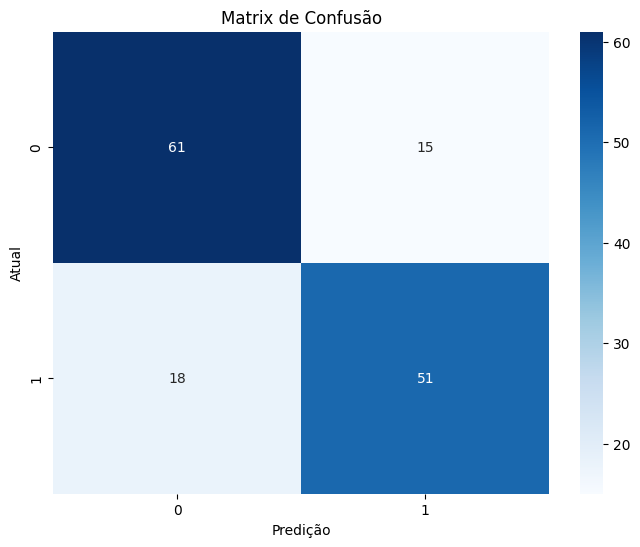

In [ ]:
#Matriz de confusão para avaliação de desempenho do modelo
#Observa-se que o modelo acerteu 61 casos onde não houve feridos e 51 onde houve feridos
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, model.predict(X_test_scaled))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.title('Matrix de Confusão')
plt.show()

In [ ]:
#Calculando o desempenho do modelo
#O modelo no obtve um desempenho razoável em classificar feridos e não feridos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

if hasattr(model, "predict_proba"):
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
else:
    auc = None

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
if auc is not None:
    print(f"ROC AUC: {auc:.4f}")


Acurácia: 0.7724
Precisão: 0.7727
Recall: 0.7391
F1-score: 0.7556
ROC AUC: 0.7643
